In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import warnings
warnings.filterwarnings("ignore")

In [2]:
import McExperiment
from McExperiment import *
import importlib
importlib.reload(McExperiment)

<module 'McExperiment' from '/Users/silsilviaaa/Desktop/FIN535/final/FIN535-Final-23F/McExperiment.py'>

In [3]:
data = pd.read_csv('data.csv')
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%Y-%m')) #assume each date per month is the last day
data.set_index(['month'],inplace=True)

In [4]:
# read in optimal allocation from excel 
def read_excel_rst(n_strat=4):
    ratios = []
    objs = []
    for i in range(n_strat):
        objs += [list(pd.read_excel('final sheet.xlsx', sheet_name=i).iloc[[11,13,15,17,19],8].values.astype('f'))]
        ratios += [list(pd.read_excel('final sheet.xlsx', sheet_name=i).iloc[2,7:12].values.astype('f'))]
    opt_ratios = pd.DataFrame(ratios, index = ['max uti','max sharpe','max sortino','min mdd'], 
                  columns=['x1','x2','x3','x4','x5'])
    opt_objs = pd.DataFrame(objs, index = ['max uti','max sharpe','max sortino','min mdd'],\
                        columns = ['sharpe','mdd','uti','CE','sortino'])
    return pd.concat([opt_ratios, opt_objs],axis = 1)

n_strat=4
opt_excel_soln = read_excel_rst(n_strat)
opt_excel_soln

,x1,x2,x3,x4,x5,sharpe,mdd,uti,CE,sortino
max uti,0.181262,1.024393,0.750000,0.75,0.205655,1.097224,0.250001,0.006363,12.076599,1.583711
max sharpe,0.490185,0.509815,0.342315,0.75,0.000000,1.552223,0.250000,0.005783,12.069595,2.142872
max sortino,0.484227,0.515773,0.356543,0.75,0.000000,1.551894,0.250000,0.005807,12.069884,2.143256
min mdd,0.463338,0.536662,0.280175,0.75,0.000000,1.510296,0.196292,0.005592,12.067296,2.096605


### Max log v-utility

In [5]:
SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120
# train_df = pd.read_csv('train.csv')

In [8]:
Simu_table_lst = []
cap_table_lst = []
Summary_table_lst = []

for i in range(n_strat):
    ratio = (opt_excel_soln.iloc[i,:5]).to_list()

    # Get the analysis for end of 5Y/7Y/10Y 
    Simu_table, Simu_cap_table = Experiments(MC,path_length,data,CAP,SAVE,g,ratio,years=[60,84,120],tax=0)
    Summary_table, cap_table = GetSummary(Simu_table, Simu_cap_table, path_length)
    Summary_table = Summary_table.fillna(0)
    Simu_table_lst += [Simu_table]
    cap_table_lst += [cap_table]
    Summary_table_lst += [Summary_table]

In [9]:
Summary_table_lst[0].round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,292294.37,91830.48,291328.69,0.00,1.20,1.74,0.20,0.63,0.63,-385010.29,-393106.11
7Y,496021.57,133730.70,394063.30,0.44,1.17,1.72,0.21,1.32,1.32,-222318.10,-241283.08
10Y,1141718.86,268615.04,0.00,1.00,1.22,1.80,1.34,2.74,2.49,196022.04,168499.43


### Max Sharpe ratio

In [10]:
Summary_table_lst[1].round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,265476.89,81936.92,265476.89,0.00,1.63,2.15,0.15,0.54,0.53,-402248.32,-407246.12
7Y,439523.08,117895.98,364559.62,0.36,1.57,2.09,0.16,0.94,0.94,-252762.13,-261926.89
10Y,968896.52,222497.70,0.00,1.00,1.66,2.28,1.00,1.98,1.94,100120.02,35002.03


### Max Sortino Ratio

In [11]:
Summary_table_lst[2].round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,265054.58,84802.85,265054.58,0.00,1.66,2.19,0.15,0.54,0.48,-406806.85,-406806.85
7Y,435472.15,122616.25,361534.93,0.34,1.57,2.10,0.15,1.04,1.01,-309498.55,-309498.55
10Y,973260.63,222997.81,0.00,1.00,1.67,2.30,1.03,1.91,1.91,35099.68,35099.68


### Min max drawdown

In [12]:
Summary_table_lst[3].round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,259943.65,84217.74,259943.65,0.00,1.58,2.09,0.14,0.49,0.49,-402189.59,-405063.75
7Y,427152.27,127425.68,350725.22,0.33,1.53,2.06,0.14,1.02,0.93,-275672.81,-281285.53
10Y,923471.98,219146.88,0.00,1.00,1.61,2.23,0.97,1.90,1.86,18879.24,18405.76


## Financial Diamond

In [13]:
def get_loc(year_pts,cap_pts):
    # points coordinates follows the order of left up right down left
    x_coor = [year_pts[0],year_pts[1],year_pts[2],year_pts[1],year_pts[0]]
    y_coor = [cap_pts[1],cap_pts[2],cap_pts[1],cap_pts[0],cap_pts[1]]
    return x_coor, y_coor

year_pts = [4,5,6]
cap_pts_lst = [[cap_table_lst[i].iloc[3,0],cap_table_lst[i].iloc[4,0], cap_table_lst[i].iloc[5,0]] for i in range(3)]

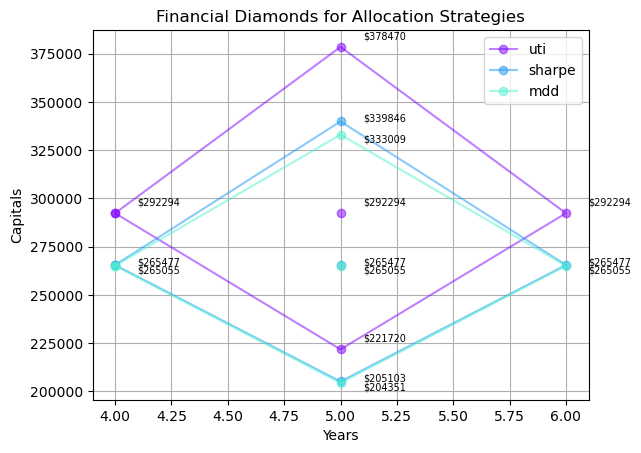

In [20]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
labels = ['uti','sharpe','mdd']
fig, ax = plt.subplots()
for i in range(len(cap_pts_lst)):
    c = next(color)
    x_coor, y_coor = get_loc(year_pts,cap_pts_lst[i])
    ax.plot(x_coor, y_coor, '-o',alpha = 0.5, label=labels[i],c=c)
    ax.plot(x_coor[1], y_coor[0], '-o',alpha = 0.5,c=c)
    for j in range(len(x_coor)-1):
        ax.annotate(f'${round(y_coor[j])}', (x_coor[j]+0.1, y_coor[j]-4000*(i-1)),fontsize=7)
    ax.annotate(f'${round(y_coor[0])}', (x_coor[1]+0.1, y_coor[0]-4000*(i-1)),fontsize=7)
ax.legend()
ax.set_title('Financial Diamonds for Allocation Strategies')
ax.set_xlabel('Years')
ax.set_ylabel('Capitals')
ax.grid()